In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta

In [2]:
import os
#get working directory in python
os.getcwd()
#change working directory in python
os.chdir("/home/belu/Escritorio/Proyecto_TESIS/reanalysis/BS_otonio")

In [3]:
anios = np.array(["1980_03","1984_04","1990_03","1991_04","1996_05","2000_04","2001_03",
                  "2003_03","2007_03","2008_04","2010_05"])

my_data="ERA_interim_reanalisis_" + anios[0] + "_gep_wind_temp_area2.nc"
fh = Dataset(my_data, mode='r')

In [4]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]

time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature
temp= fh.variables["t"][:]

hgt_units = fh.variables['z'].units
temp_units = fh.variables['t'].units


In [8]:
#Que fechas deseeo? -->  cada dia tiene 4 tiempos 00UTC 06UTC 12UTC y 18UTC.
# 1980/03/ --> dias: 7 Y 30   dia*4 - 5 
#dia=7
#vec= dia*4 - 5 : dia*4 -1
#aux=np.array([range(dia*4 -4, dia*4 )])

aux1= np.array([range(i - 4, i ) for i in [7*4, 30*4]])
aux1
#np.array([range(i, i + 3) for i in [2, 4, 6]])

# 1984/04/ --> dia : 18
# 1990/03/ --> dia : 14
# 1991/04/ --> dia : 03
# 1996/05  --> dia : 22
# 2000/04/ --> dia : 14
# 2001/03/ --> dia : 22
# 2003/03/ --> dia : 03
# 2007/03/ --> dia : 27
# 2008/04/ --> dia : 29
# 2010/05/ --> dia : 15

#fh.variables

array([[ 24,  25,  26,  27],
       [116, 117, 118, 119]])

In [5]:
#Me posiciono en la fecha que deseo 
fecha_init = datetime(1900,1,1,0,0,0)
#print(fecha_init)
#https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types
hora=time[119].item() 
horas=timedelta(hours = hora)
fecha= fecha_init + horas
#print(fecha)
fecha_str=datetime.strftime(fecha, '%d/%m/%Y_%H%MUTC')

print (fecha_str)

30/03/1980_1800UTC


In [6]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

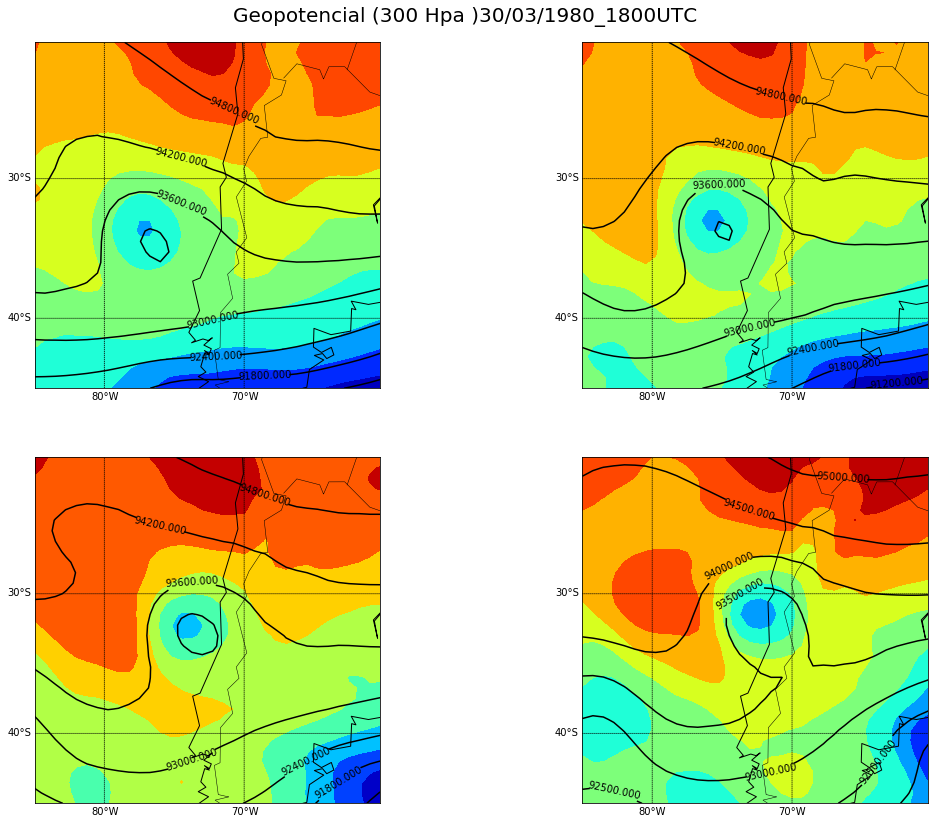

In [25]:
# Plot Data
fig = plt.figure(figsize=(18,14))

#############################################################################################################
ax1 = fig.add_subplot(2,2,1)
# hgt(tiempo, nivel)
cs = m.contour(xi,yi,np.squeeze(hgt[116,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(temp[116,1]), cmap= "jet")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs1, location='bottom', pad="10%")
#cbar.set_label(hgt_units)

###############################################################################################################
ax1 = fig.add_subplot(2,2,2,aspect=1.0)

cs = m.contour(xi,yi,np.squeeze(hgt[117,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(temp[117,1]),cmap="jet")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs1, location='bottom', pad="10%")
#cbar.set_label(hgt_units)

################################################################################################################
ax1 = fig.add_subplot(2,2,3,aspect=1.0)

cs = m.contour(xi,yi,np.squeeze(hgt[118,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(temp[118,1]), cmap= "jet")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs1, location='right', pad="10%")
#cbar.set_label(hgt_units)

###############################################################################################################
ax1 = fig.add_subplot(2,2,4,aspect=1.0)

cs = m.contour(xi,yi,np.squeeze(hgt[119,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(temp[119,1]), cmap = "jet")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
#cbar = m.colorbar(cs1, location='right', pad="10%")
#cbar.set_label(hgt_units)


# Add Title
#plt.title('Geopotencial (300 Hpa )'+ fecha_str)
plt.figtext(.5,.9,'Geopotencial (300 Hpa )'+ fecha_str, fontsize=20, ha='center')
plt.show()